In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import  wrangle
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_df = pd.read_csv('Loan_modelling.csv')

In [3]:
raw_df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
raw_df.Age.max()

67

In [5]:
#bins Age , income, CCAv, experience
# give name sto specific groups 
# check for null values, and handle them
# check for outliers and handle them
# visualization and take away
# hypotheses testing and take away
# ecode variables
# split data 
# modeling
# testing

# write executive summary 
# readMe

# document


In [6]:
loan= raw_df.copy()

In [7]:
loan.shape

(5000, 14)

In [8]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
loan.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
loan.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
 loan.Experience.value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 22    124
 29    124
 7     121
 15    119
 8     119
 6     119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 4     113
 21    113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

In [35]:
loan["Experience"].replace({-1: 0, -2: 0,-3:0}, inplace=True)

In [66]:
loan[loan.Experience == -2]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


In [37]:
loan[loan.Experience == -1]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


In [38]:
loan.Experience.median()

20.0

In [39]:
loan[loan.Experience ==0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,90,25,0,113,94303,4,2.30,3,0,0,0,0,0,1
105,106,24,0,35,94704,3,0.10,2,0,0,1,0,1,0
151,152,26,0,132,92834,3,6.50,3,0,1,0,0,0,1
155,156,24,0,60,94596,4,1.60,1,0,0,0,0,1,0
156,157,26,0,15,92131,4,0.40,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,4902,26,0,54,96094,3,1.10,2,0,0,0,0,1,0
4934,4935,26,0,85,93950,2,1.60,3,0,0,0,0,1,1
4943,4944,26,0,12,96003,1,0.10,2,0,0,0,0,1,0
4957,4958,29,0,50,95842,2,1.75,3,0,0,0,0,0,1


In [40]:
loan[loan.Experience == -3]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard


In [41]:
 loan.Income.value_counts()

44     85
38     84
81     83
41     82
39     81
       ..
202     2
189     2
203     2
218     1
224     1
Name: Income, Length: 162, dtype: int64

In [42]:
cat_var = ['Family','Education','Securities_Account','CD_Account','Online','CreditCard']
quant_vars = ['Age','Income','CCAvg','Mortgage']
target = ['Personal_Loan']

In [43]:
#wrangle.explore_univariate(loan, cat_var, quant_vars)

In [44]:
#wrangle.explore_bivariate(loan, 'Personal_Loan', cat_var, quant_vars)

In [ ]:
wrangle.m

In [45]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

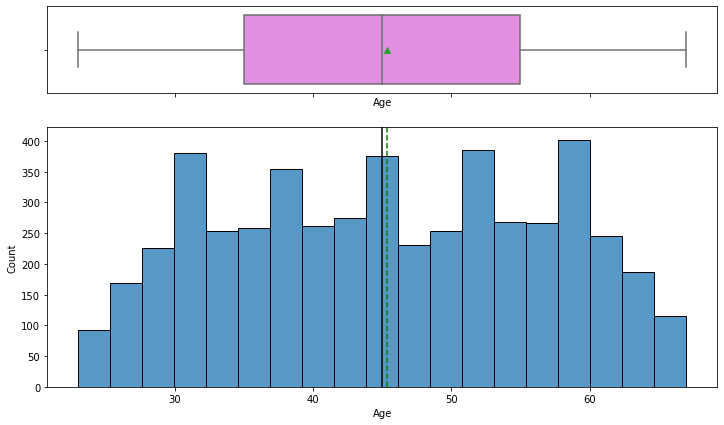

In [46]:
histogram_boxplot(loan, "Age")

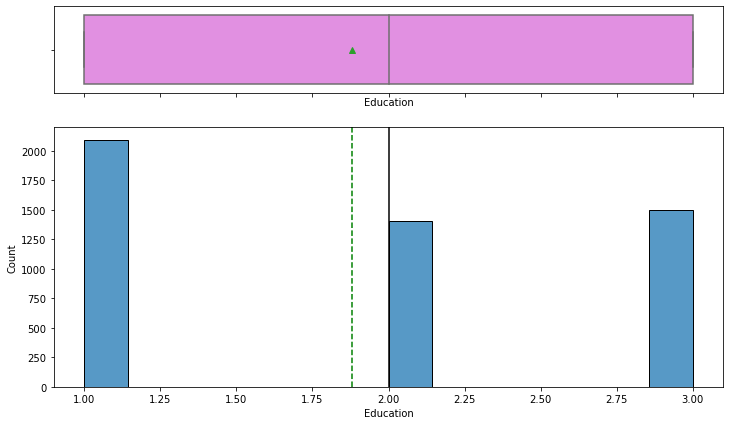

In [47]:
histogram_boxplot(loan, "Education")

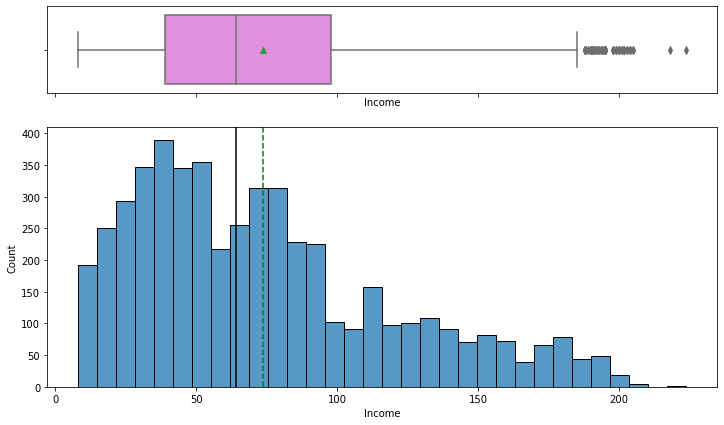

In [48]:
histogram_boxplot(loan,'Income')

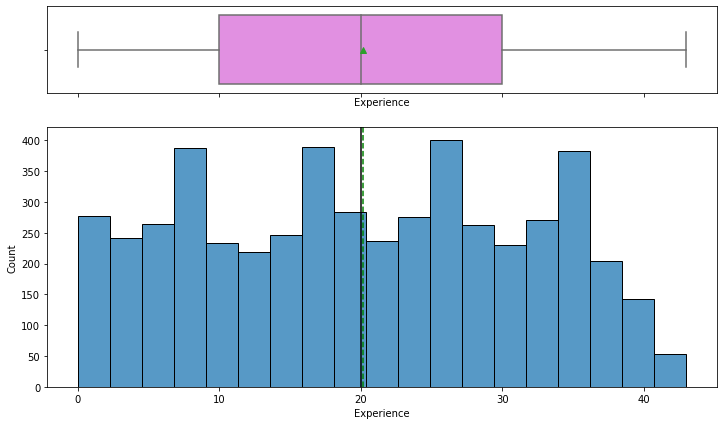

In [49]:
histogram_boxplot(loan, 'Experience')

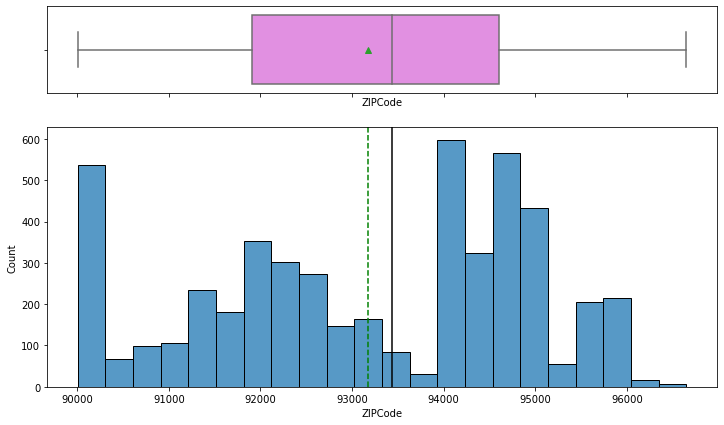

In [50]:
histogram_boxplot(loan, 'ZIPCode')

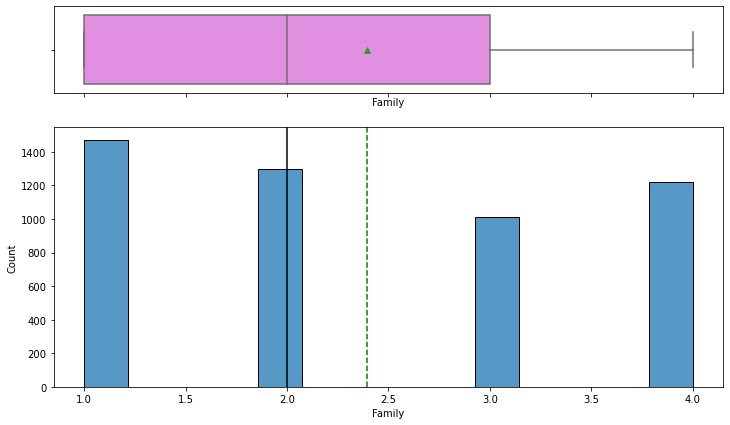

In [51]:
histogram_boxplot(loan, 'Family')

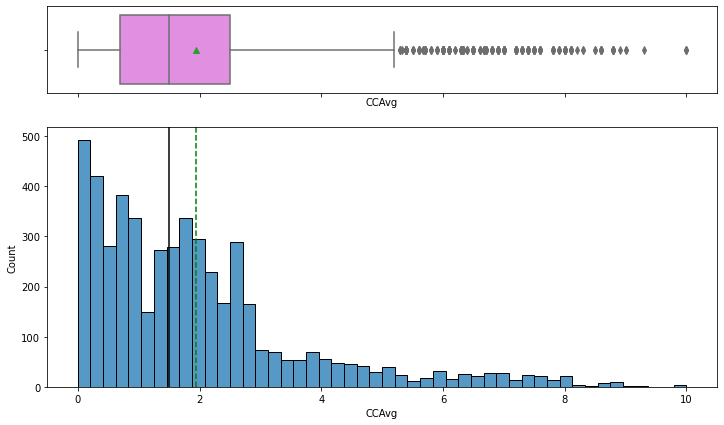

In [52]:
histogram_boxplot(loan, 'CCAvg')

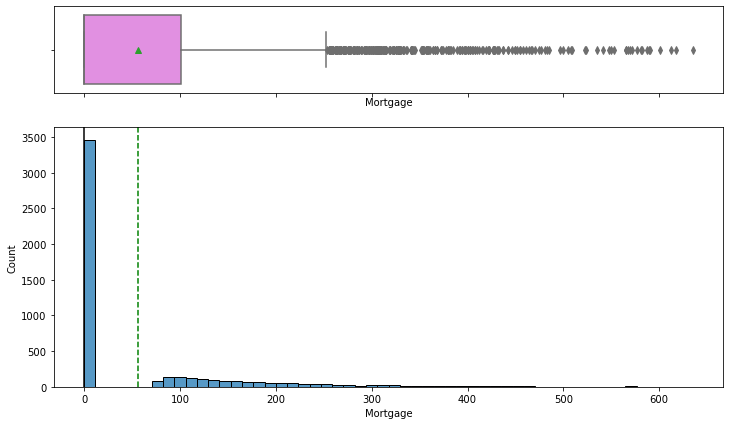

In [29]:
histogram_boxplot(loan, 'Mortgage')

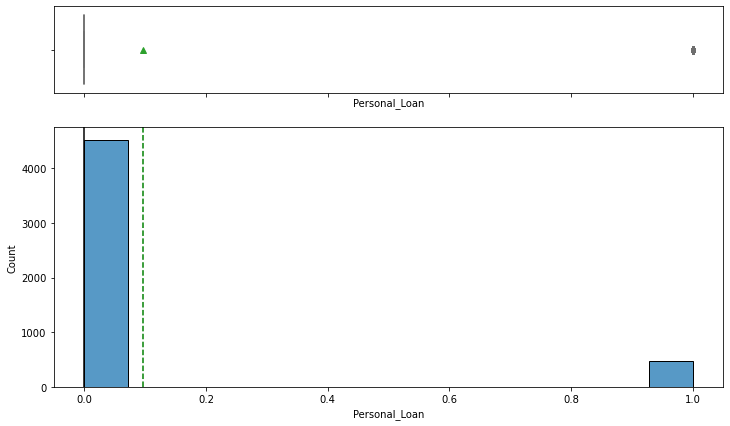

In [30]:
histogram_boxplot(loan, 'Personal_Loan')

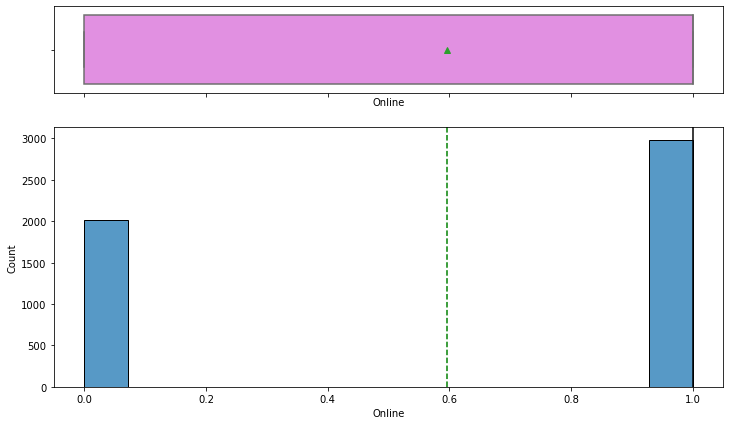

In [31]:
histogram_boxplot(loan, 'Online')

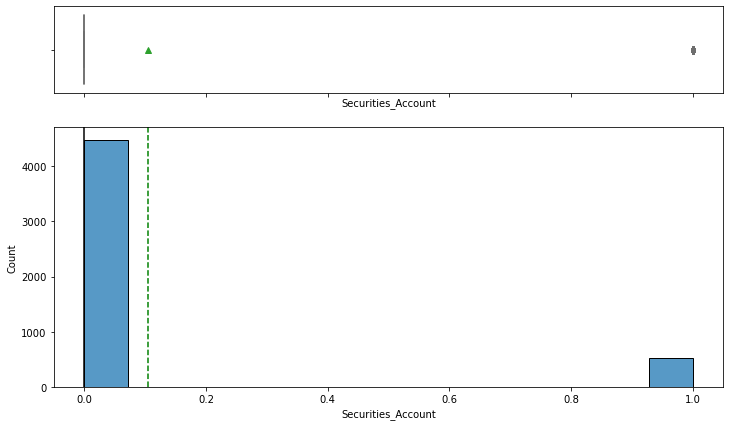

In [32]:
histogram_boxplot(loan, 'Securities_Account')

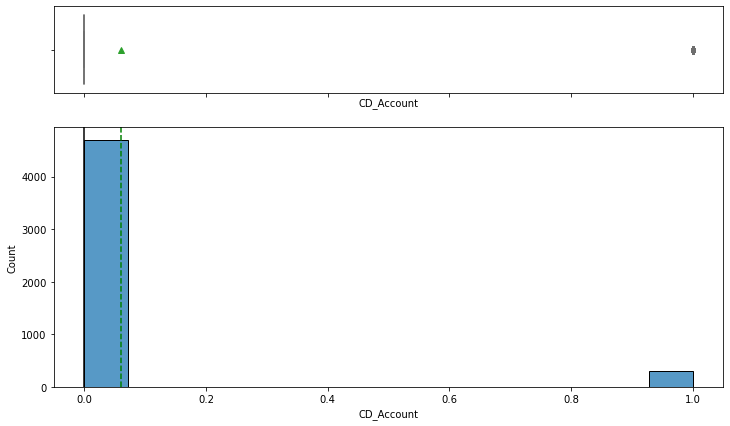

In [33]:
histogram_boxplot(loan, 'CD_Account')

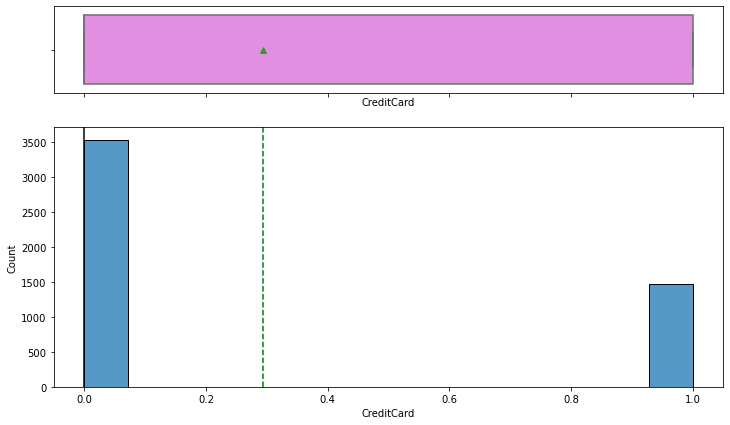

In [34]:
histogram_boxplot(loan, 'CreditCard')

In [53]:
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()


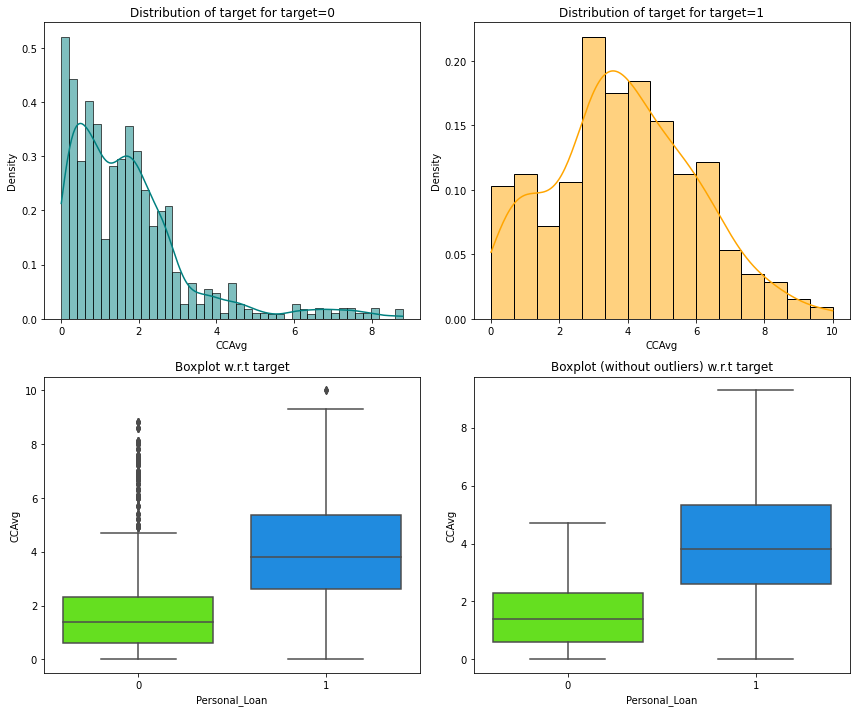

In [54]:
distribution_plot_wrt_target(loan, 'CCAvg', 'Personal_Loan')

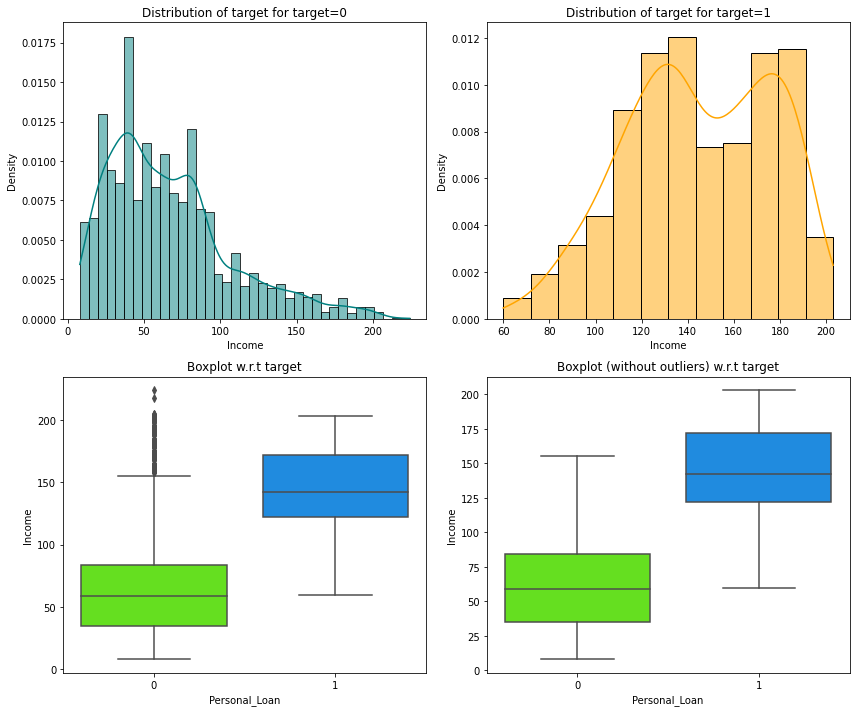

In [55]:
distribution_plot_wrt_target(loan, 'Income', 'Personal_Loan')

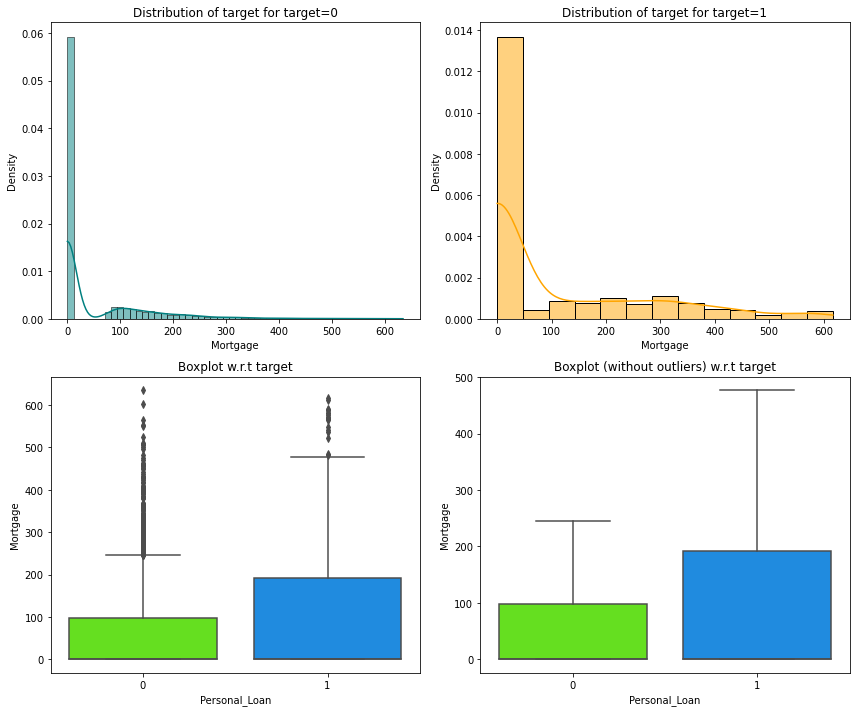

In [56]:
distribution_plot_wrt_target(loan, 'Mortgage', 'Personal_Loan')

In [70]:
# filtering object type columns
cat_columns = loan.describe(include=["int64"]).columns
cat_columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'Education',
       'Mortgage', 'Personal_Loan', 'Securities_Account', 'CD_Account',
       'Online', 'CreditCard'],
      dtype='object')

In [71]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(loan[i].value_counts())
    print("*" * 50)

Unique values in ID are :
2049    1
1210    1
3271    1
1222    1
3267    1
       ..
2604    1
4651    1
553     1
2600    1
2047    1
Name: ID, Length: 5000, dtype: int64
**************************************************
Unique values in Age are :
35    151
43    149
52    145
58    143
54    143
50    138
41    136
30    136
56    135
34    134
39    133
57    132
59    132
51    129
60    127
45    127
46    127
42    126
31    125
40    125
55    125
29    123
62    123
61    122
44    121
33    120
32    120
48    118
49    115
38    115
47    113
53    112
63    108
36    107
37    106
28    103
27     91
65     80
64     78
26     78
25     53
24     28
66     24
23     12
67     12
Name: Age, dtype: int64
**************************************************
Unique values in Experience are :
32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
24    131
3     129
14    127
16    127
30    126
27    125
17    125
34    125
